In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# import pandas_profiling as pp

In [107]:
# removes junk values in cells
def hash_value_mapper(value):
    if(value == '#VALUE!'):
       return 'NaN';
    elif(value[-1] == '%'):
       return float(value[:-1]);
    return float(value);

# maps string type integer values to Integer type
def string_to_int_mapper(value):
    return int(value);

# translates age into age-groups
def ageMapper(ageArray):
    age_group_array = [];
    for age in ageArray:
        age = int(age)
        lowerLim =  (int(age/10) - 1) if int(age/10) == age/10 else int(age/10);
        upperLim = lowerLim + 1;
        age_group_array.append('{0} - {1}'.format(lowerLim*10 + 1, upperLim*10));
    return age_group_array;

In [108]:
retention_data = pd.read_csv('./data/retention/insurance_cust_retention.csv',
                             converters = {'Actual Change in Price vs last Year': hash_value_mapper,
                                          '% Change in Price vs last Year': hash_value_mapper,
                                          'Grouped Change in Price': hash_value_mapper,
                                          'Years of Tenure with Current Provider': string_to_int_mapper}
                            );
retention_data.columns = retention_data.columns.str.replace(" ", "_");
retention_data.rename(columns = {'AGE':'Age',
                                 '%_Change_in_Price_vs_last_Year':'percent_Change_in_Price_vs_last_Year',
                                 'Renewed?':'Renewed'},
                     inplace=True);


In [109]:
retention_data['Age_group'] = ageMapper(retention_data.Age);

<span style='color:blue'>**Cast columns to floating point numbers**</span>

In [110]:
retention_data.Actual_Change_in_Price_vs_last_Year = retention_data.Actual_Change_in_Price_vs_last_Year.astype('float64');
retention_data.percent_Change_in_Price_vs_last_Year = retention_data.percent_Change_in_Price_vs_last_Year.astype('float64');
retention_data.Grouped_Change_in_Price = retention_data.Grouped_Change_in_Price.astype('float64');

In [111]:
retention_data.head()

,Marital_Status,Age,Gender,Car_Value,Years_of_No_Claims_Bonus,Annual_Mileage,Payment_Method,Acquisition_Channel,Years_of_Tenure_with_Current_Provider,Price,Actual_Change_in_Price_vs_last_Year,percent_Change_in_Price_vs_last_Year,Grouped_Change_in_Price,Renewed,Age_group
0,M,45,F,500,4,6000,Monthly,Inbound,4,289.4,-11.94,-3.96,-0.05,0,41 - 50
1,M,40,M,3000,8,6000,Monthly,Inbound,4,170.4,45.62,37.00,0.35,1,31 - 40
2,S,25,F,4000,4,4000,Monthly,Inbound,4,466.1,-123.15,-21.00,-0.20,1,21 - 30
3,M,42,M,1800,9,10000,Annual,Inbound,4,245.1,2.34,1.00,0.00,1,41 - 50
4,M,59,M,5000,9,3000,Annual,Inbound,4,240.5,42.56,22.00,0.20,0,51 - 60


In [112]:
retention_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20020 entries, 0 to 20019
Data columns (total 15 columns):
Marital_Status                           20020 non-null object
Age                                      20020 non-null int64
Gender                                   20020 non-null object
Car_Value                                20020 non-null int64
Years_of_No_Claims_Bonus                 20020 non-null int64
Annual_Mileage                           20020 non-null int64
Payment_Method                           20020 non-null object
Acquisition_Channel                      20020 non-null object
Years_of_Tenure_with_Current_Provider    20020 non-null int64
Price                                    20017 non-null float64
Actual_Change_in_Price_vs_last_Year      20017 non-null float64
percent_Change_in_Price_vs_last_Year     20017 non-null float64
Grouped_Change_in_Price                  20017 non-null float64
Renewed                                  20020 non-null int64
Age_group  

***

## Missing value treatment

In [113]:
#replace NaN with mean
retention_data.Actual_Change_in_Price_vs_last_Year.fillna(value = retention_data.Actual_Change_in_Price_vs_last_Year.mean(), 
                                                          inplace=True);
retention_data.Grouped_Change_in_Price.fillna(value = retention_data.Grouped_Change_in_Price.mean(), 
                            inplace=True);
retention_data.percent_Change_in_Price_vs_last_Year.fillna(value = retention_data.percent_Change_in_Price_vs_last_Year.mean(), 
                            inplace=True);
retention_data.Price.fillna(value = retention_data.Price.mean(), 
                            inplace=True)

***

## Split data into numerical and categorical features

In [114]:
retention_numerical = retention_data.select_dtypes(['int64', 'float64']);
retention_categorical = retention_data.select_dtypes(['object']);

In [115]:
retention_categorical.head()

,Marital_Status,Gender,Payment_Method,Acquisition_Channel,Age_group
0,M,F,Monthly,Inbound,41 - 50
1,M,M,Monthly,Inbound,31 - 40
2,S,F,Monthly,Inbound,21 - 30
3,M,M,Annual,Inbound,41 - 50
4,M,M,Annual,Inbound,51 - 60


### Process numerical features

In [116]:
retention_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20020.0,44.744555,12.680561,17.00,36.00,44.000,52.0000,89.00
Car_Value,20020.0,3686.924126,3981.033913,0.00,1000.00,2500.000,5000.0000,60000.00
Years_of_No_Claims_Bonus,20020.0,5.757143,2.894185,0.00,3.00,6.000,9.0000,9.00
Annual_Mileage,20020.0,6528.061239,3585.303675,1.00,4000.00,5200.000,9000.0000,70000.00
Years_of_Tenure_with_Current_Provider,20020.0,2.479620,0.853137,1.00,2.00,2.000,3.0000,4.00
Price,20020.0,422.485702,262.405063,96.00,264.20,357.300,501.6250,4449.90
Actual_Change_in_Price_vs_last_Year,20020.0,16.630885,411.036698,-20576.48,-21.89,15.555,58.8325,36974.28
percent_Change_in_Price_vs_last_Year,20020.0,12.208675,320.482642,-3866.00,-6.00,5.000,21.0000,44140.00
Grouped_Change_in_Price,20020.0,0.121934,3.204866,-38.65,-0.05,0.050,0.2000,441.40
Renewed,20020.0,0.621329,0.485068,0.00,0.00,1.000,1.0000,1.00


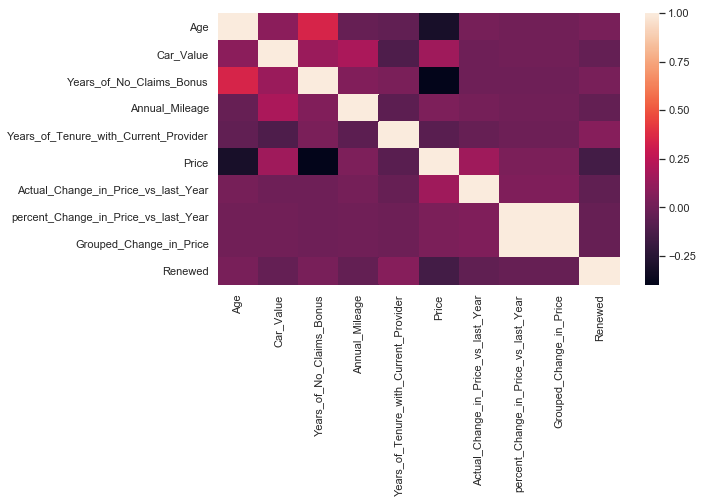

In [117]:
sns.heatmap(retention_numerical.corr());
sns.set(rc={'figure.figsize': (9,5)})

<span style='color:red'>We observe high correlation between __percent_Change_in_Price_vs_last_Year__ and __Grouped_Change_in_Price__. We will drop __percent_Change_in_Price_vs_last_Year__ from our dataset.</span>

***

***

## Exploration

In [118]:
renewed_labels = [];
renewed_data = [];

for(renewed), sub_df in retention_data.groupby('Renewed'):
    renewed_data.append(sub_df.Renewed.count());
    renewed_labels.append('Renewed' if renewed == 1 else 'Not Renewed');
    print(renewed, sub_df.Renewed.count())

0 7581
1 12439


In [119]:
gender_labels = [];
gender_data = [];

for(gender), sub_df in retention_data.groupby('Gender'):
    gender_data.append(sub_df.Gender.count());
    gender_labels.append('Male' if gender == 'M' else 'Female' if gender =='F' else gender);
    print(gender, sub_df.Gender.count())

C 20
F 9056
M 10944


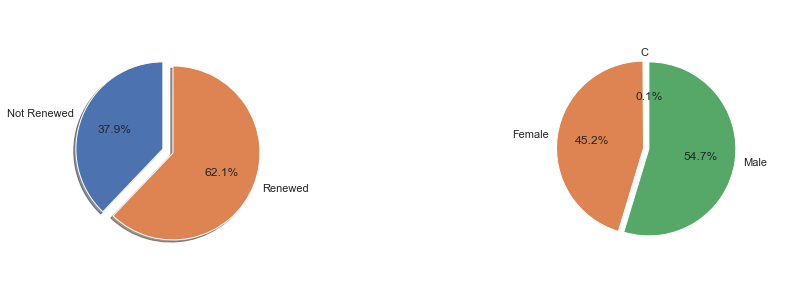

In [120]:
fig, axs = plt.subplots(1,2)
plt.subplots_adjust(right= 1.5)
axs[0].pie(renewed_data, labels=renewed_labels, autopct='%1.1f%%', explode=[0, 0.1], radius = 0.8,
        shadow=True, startangle=90);
axs[1].pie(gender_data, labels=gender_labels, autopct='%1.1f%%', explode=[0, 0.05, 0], radius = 0.8,
        shadow=False, startangle=90);



***

<u><b>Renewal rate w.r.t. to Age group</b></u>

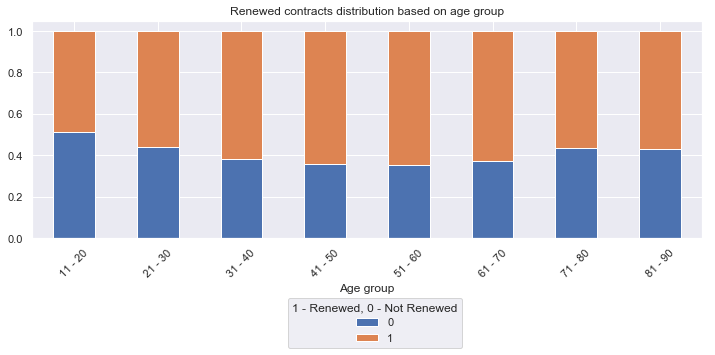

In [138]:
props = retention_data.groupby('Age_group')['Renewed'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True, legend=True,
           title = 'Renewed contracts distribution based on age group', 
           figsize = (12,4));
plt.xlabel("Age group");
plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(0.65, -0.25), title = '1 - Renewed, 0 - Not Renewed');


<span style='color:red'>**Conclusion:** </span>
<span style='color:green'>**Renewal rate increases with age peaking at age group <u>41-60</u> and then decreases with further increment in age**</span>

***

<u><b>Renewal rate w.r.t. to Gender and Marital Status</b></u>

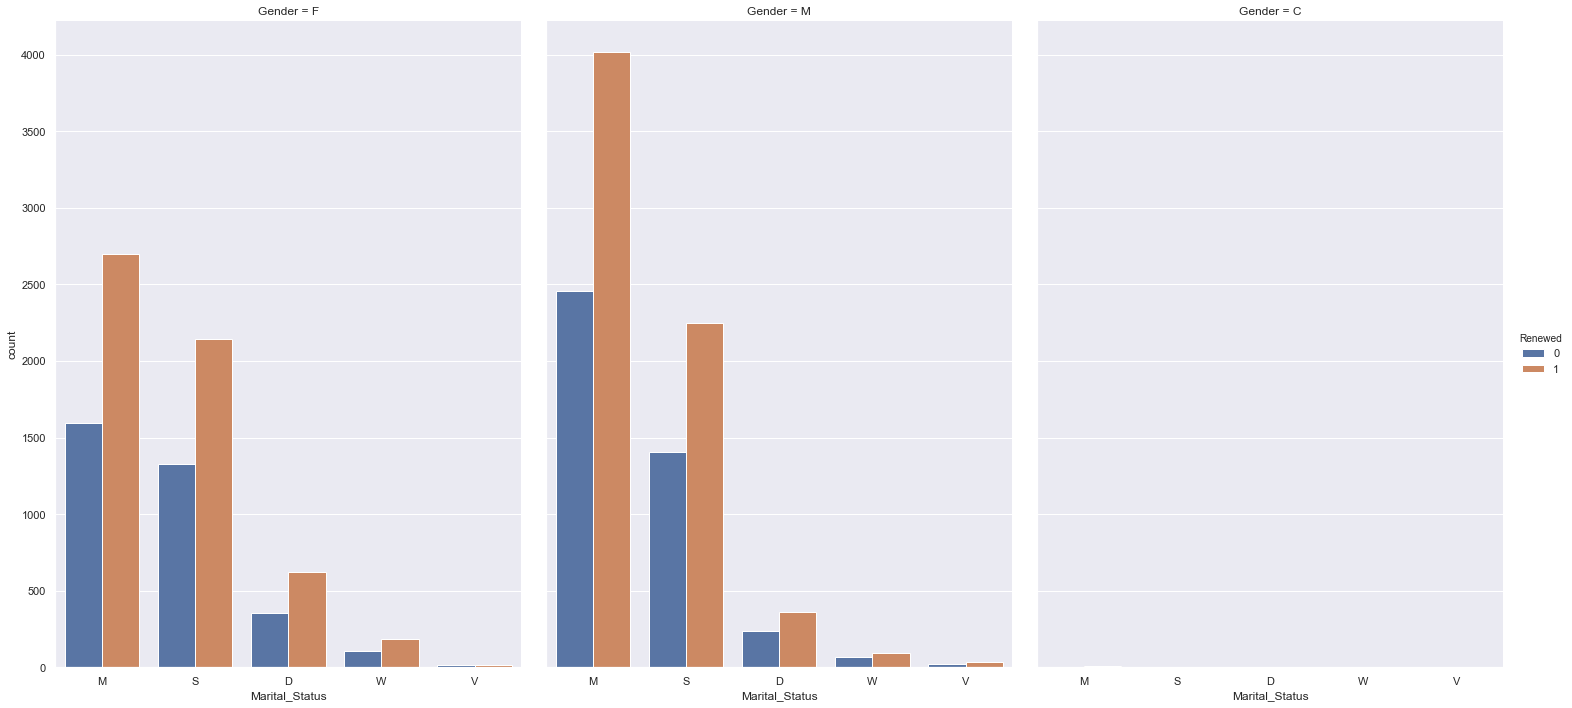

In [122]:
sns.catplot("Marital_Status", col="Gender", data=retention_data, kind="count",size=10, aspect=0.7, hue='Renewed');

***

<u><b>Marital status vs Renewal rate</b></u>

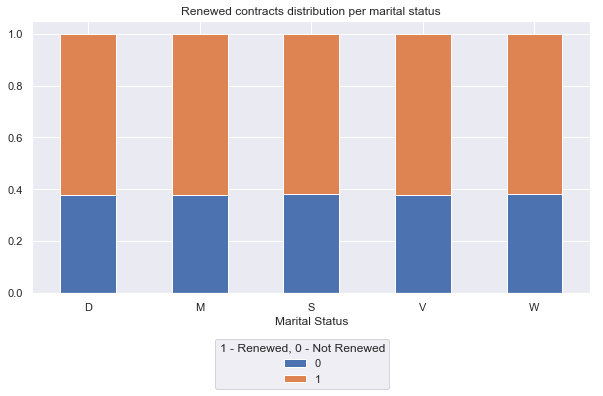

In [133]:
props = retention_data.groupby('Marital_Status')['Renewed'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True,
           title = 'Renewed contracts distribution per marital status', 
           figsize = (10,5));
plt.legend(bbox_to_anchor=(0.65, -0.15), title = '1 - Renewed, 0 - Not Renewed');
plt.xticks(rotation=0);
plt.xlabel("Marital Status");

<span style='color:red'>**Conclusion:** </span>
<span style='color:green'>**Renewal rate is irrelavant of the Marital Status**</span>
<br><br>
<span style='color:red'>**Note:** </span>
<span style='color:red'>**Marital Status is not a good feature for model creation**</span>

***

<u><b>Gender vs Renewal rate</b></u>

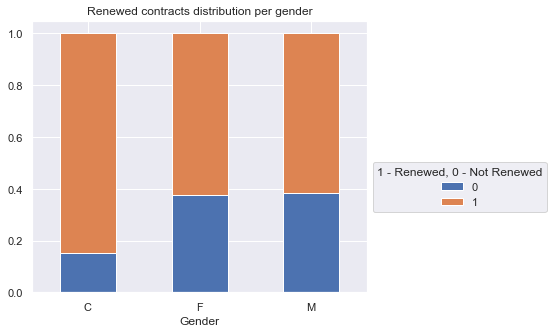

In [73]:
props = retention_data.groupby('Gender')['Renewed'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True,
           title = 'Renewed contracts distribution per gender', 
           figsize = (6,5));
plt.legend(bbox_to_anchor=(1.0, 0.5), title = '1 - Renewed, 0 - Not Renewed');
plt.xticks(rotation=0);

<span style='color:red'>**Conclusion:** </span>
<span style='color:green'>**Renewal rate is irrelavant of the Gender.**</span>
<br><br>
<span style='color:red'>**Note:** </span>
<span style='color:red'>**Gender is not a good feature for model creation**</span>

***

<u><b>Payment method vs Renewal rate</b></u>

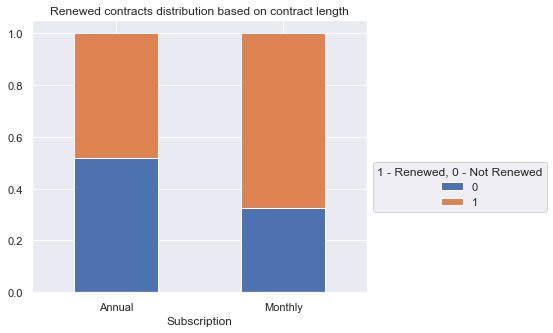

In [74]:
props = retention_data.groupby('Payment_Method')['Renewed'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True,
           title = 'Renewed contracts distribution based on contract length', 
           figsize = (6,5));
plt.legend(bbox_to_anchor=(1.0, 0.5), title = '1 - Renewed, 0 - Not Renewed');
plt.xticks(rotation=0);
plt.xlabel("Subscription");

<span style='color:green'>**Around 74% of monthly contracts are renewed.**</span><span style='color:red'> **vs. only ~50% of annual contracts.**</span>

***

<u><b>Acquisition channel vs Renewal rate</b></u>

**Apendix**
> **Outbound:** company approaches customers using their customer care center etc.  
  **Inbound:** customer finds company through social media, search, etc.  
  **Direct:** company sells directly to customers on their website.  
  **Aggregators:** comparison sites.


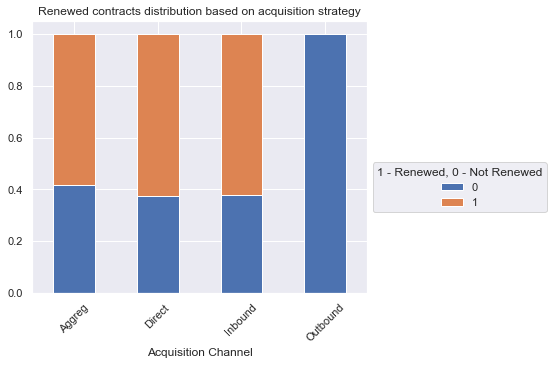

In [75]:
props = retention_data.groupby('Acquisition_Channel')['Renewed'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True,
           title = 'Renewed contracts distribution based on acquisition strategy', 
           figsize = (6,5));
plt.legend(bbox_to_anchor=(1.0, 0.5), title = '1 - Renewed, 0 - Not Renewed');
plt.xticks(rotation=45);
plt.xlabel("Acquisition Channel");

<span style='color:red'> 
    **The <u>Outbound acquisition</u> method is not effective.<br> 
    The renewal rate in this case is 0%. <br>
    The company should redefine Outbound acquisition strategy.**
</span>

***

<u><b> Renewal Rate w.r.t. Tenure </b></u>

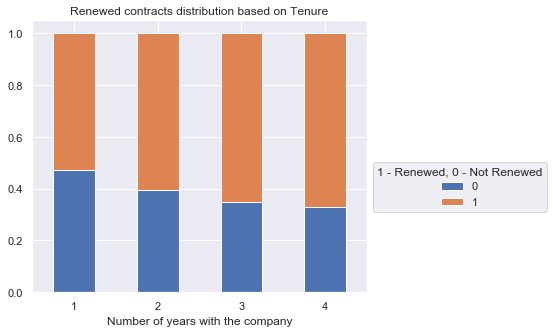

In [76]:
props = retention_data.groupby('Years_of_Tenure_with_Current_Provider')['Renewed'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True,
           title = 'Renewed contracts distribution based on Tenure', 
           figsize = (6,5));
plt.xlabel("Number of years with the company");
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 0.5), title = '1 - Renewed, 0 - Not Renewed');

<span style='color:red'>**Conclusion:** </span>
<span style='color:green'>**Renewal rate increases with increase in Tenure.**</span><br><br>
<span style='color:blue'> <u>People are more likely to renew if they are associated with the Insurance company for a longer period of time.</u></span>

***

<u><b> Renewal rate w.r.t. times increase in actual price vs Price </b></u>

In [77]:
def getActualPriceChangeGreaterThanPriceRows(i):
    return retention_data[retention_data.Actual_Change_in_Price_vs_last_Year > retention_data.Price*i];

value_count_arr = pd.DataFrame();
i = 0;

while(True):
    i += 1;
    actual_price_change_times_i_greater_than_Price = getActualPriceChangeGreaterThanPriceRows(i);
    if(len(actual_price_change_times_i_greater_than_Price) <=1):
        break;
    value_count_arr[i] = (actual_price_change_times_i_greater_than_Price.Renewed.value_counts());

    
value_count_arr.fillna(0, inplace=True)
display(value_count_arr)
   

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,29,9,6,5,5,5,3,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0
0,17,8,8,4,4,3,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0


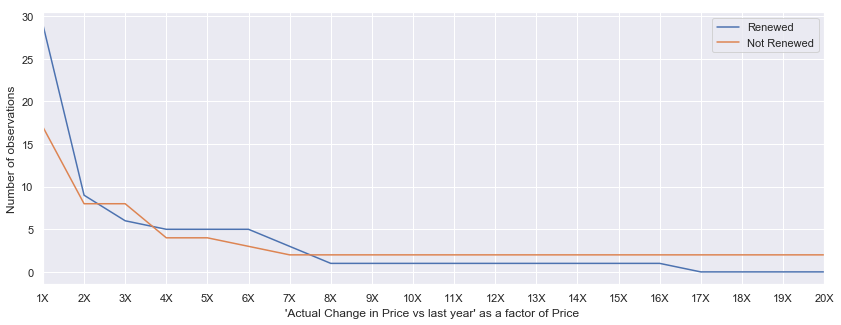

In [78]:
fig, (ax1) = plt.subplots(sharey=True, sharex=True)

value_count_arr.iloc[0].plot(ax=ax1, figsize = (14,5))
value_count_arr.iloc[1].plot(ax=ax1)
plt.legend(['Renewed', 'Not Renewed']);

plt.xlabel("'Actual Change in Price vs last year' as a factor of Price ");
plt.ylabel("Number of observations");
plt.xticks(value_count_arr.columns, labels = [str(s) + 'X' for s in value_count_arr.columns]);

<span style='color:red'>**Conclusion:** </span><br>
<span style='color:green'>**We observe a change in renewal rate with increment in Actual change in price vs last year'.  
<u>As the 'Actual change in price vs last year' increase more that 7.5 times, the number of policies renewed decreases.</u>**</span><br><br>

***

### Outlier analysis

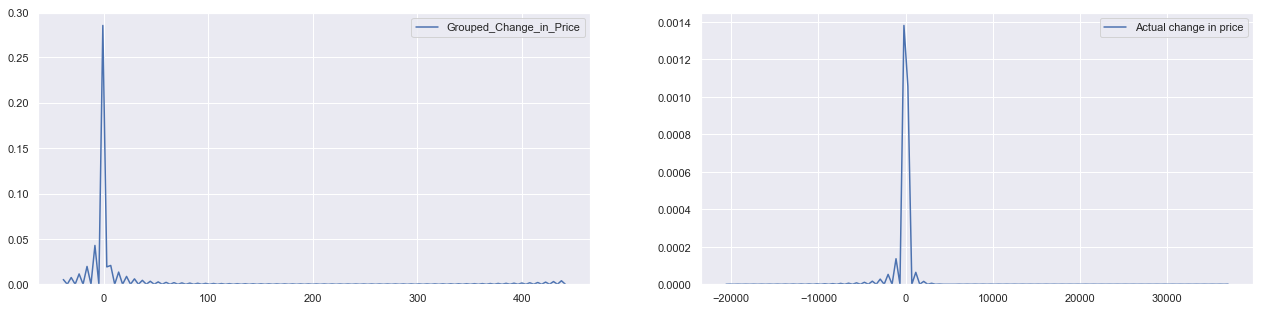

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols=2);
plt.subplots_adjust(right= 2);
sns.kdeplot(retention_data.Grouped_Change_in_Price, ax=ax1);
plt.legend(loc=1, labels=['Grouped change in price']);
sns.kdeplot(retention_data.Actual_Change_in_Price_vs_last_Year, ax=ax2);
plt.legend(loc=1, labels=['Actual change in price']);

Fig 1: Data is left skewed with presence of outliers.  
Fig 2: Data contains outliers.

In [80]:
#Remove outliers
retention_data[(
                   (retention_data.Grouped_Change_in_Price > 60) | 
                   (retention_data.Actual_Change_in_Price_vs_last_Year > retention_data.Price*10) | 
                   (retention_data.Actual_Change_in_Price_vs_last_Year < -5000)
               )]

,Marital_Status,Age,Gender,Car_Value,Years_of_No_Claims_Bonus,Annual_Mileage,Payment_Method,Acquisition_Channel,Years_of_Tenure_with_Current_Provider,Price,Actual_Change_in_Price_vs_last_Year,percent_Change_in_Price_vs_last_Year,Grouped_Change_in_Price,Renewed,Age_group
800,M,37,F,20000,8,2500,Monthly,Inbound,4,500.8,-20576.48,-98.0,-1.00,0,31 - 40
2246,S,25,M,2000,3,5200,Monthly,Direct,4,577.5,-7462.74,-93.0,-0.95,0,21 - 30
3382,M,58,F,2500,3,5000,Annual,Direct,3,203.1,-5213.77,-96.0,-0.95,1,51 - 60
4636,M,38,M,5400,0,2400,Monthly,Inbound,3,985.8,-7335.28,-88.0,-0.90,1,31 - 40
7027,M,32,M,5000,8,2000,Annual,Direct,3,316.4,-7678.24,-96.0,-0.95,1,31 - 40
12066,D,50,F,12000,2,10000,Monthly,Inbound,2,380.6,-7642.31,-95.0,-0.95,1,41 - 50
16382,S,41,M,7000,4,8000,Monthly,Inbound,2,817.7,815.86,44140.0,441.40,0,41 - 50
16562,S,37,M,2000,4,7999,Monthly,Direct,2,359.0,7532.56,-105.0,-1.05,0,31 - 40
17141,S,19,F,1001,0,7000,Annual,Inbound,2,1039.1,-6483.90,-86.0,-0.85,0,11 - 20
18237,M,66,M,5000,4,6999,Monthly,Direct,2,992.8,16021.14,-107.0,-1.05,1,61 - 70


In [81]:
# Remove outliers
retention_data = retention_data[~(
                   (retention_data.Grouped_Change_in_Price > 60) | 
                   (retention_data.Actual_Change_in_Price_vs_last_Year > retention_data.Price*10) | 
                   (retention_data.Actual_Change_in_Price_vs_last_Year < -(retention_data.Price*10))
               )]

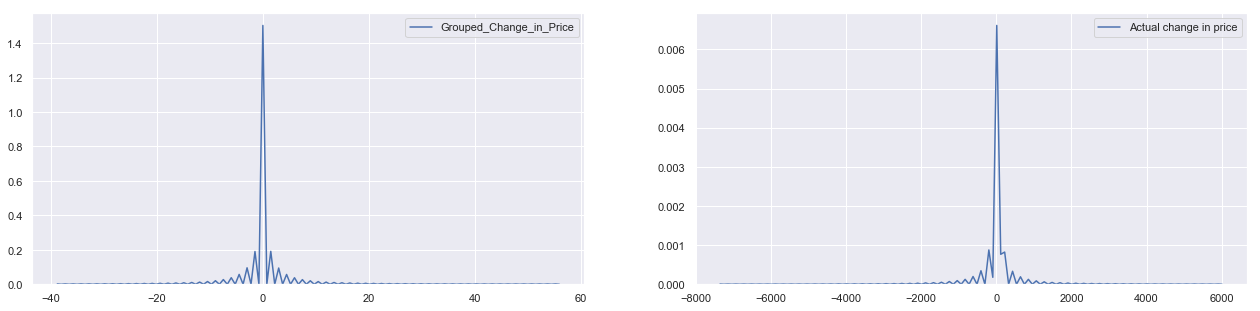

In [82]:
fig, (ax1, ax2) = plt.subplots(ncols=2);
plt.subplots_adjust(right= 2);
sns.kdeplot(retention_data.Grouped_Change_in_Price, ax=ax1);
plt.legend(loc=1, labels=['Grouped change in price']);
sns.kdeplot(retention_data.Actual_Change_in_Price_vs_last_Year, ax=ax2);
plt.legend(loc=1, labels=['Actual change in price']);

The data is now normalized.

***

## Feature Selection

Following feature will be dropped.

1. Marital status - Similar Renewal rate across all statuses.  
1. Gender - Similar Renewal rate across all genders.  
1. Percent change is price vs last year - Perfectly correlated with 'Grouped change in Price'  


In [83]:
# dropping Age-group
retention_data.drop(columns = ['Age_group', 
                               'percent_Change_in_Price_vs_last_Year', 
                               'Marital_Status', 
                               'Gender'], 
                    inplace=True);

***

### Duplicate data verification

In [84]:
print("Duplicate row count:", len(retention_data[retention_data.duplicated(keep=False)==True]));

Duplicate row count: 0


### Data sufficiency verification

In [85]:
outcome_value_count = retention_data.Renewed.value_counts();
least_outcome_count = outcome_value_count[0];

for count in outcome_value_count:
    if(least_outcome_count > count):
        least_outcome_count = count
        

least_outcome_probability = least_outcome_count / outcome_value_count.sum();
minimum_observation_count = (10*(len(retention_data.columns) - 1)) / least_outcome_probability;

In [86]:
print('Minimum observations required', minimum_observation_count);
if(len(retention_data) > minimum_observation_count):
    print('Available data is sufficient for Logistical Regression model')
else:
    print('Data not sufficient for Logistical regression model')

Minimum observations required 264.110348468849
Available data is sufficient for Logistical Regression model


***

## One Hot Encoding

In [87]:
retention_data_complete = pd.get_dummies(retention_data);
retention_data_complete.head()

,Age,Car_Value,Years_of_No_Claims_Bonus,Annual_Mileage,Years_of_Tenure_with_Current_Provider,Price,Actual_Change_in_Price_vs_last_Year,Grouped_Change_in_Price,Renewed,Payment_Method_Annual,Payment_Method_Monthly,Acquisition_Channel_Aggreg,Acquisition_Channel_Direct,Acquisition_Channel_Inbound,Acquisition_Channel_Outbound
0,45,500,4,6000,4,289.4,-11.94,-0.05,0,0,1,0,0,1,0
1,40,3000,8,6000,4,170.4,45.62,0.35,1,0,1,0,0,1,0
2,25,4000,4,4000,4,466.1,-123.15,-0.20,1,0,1,0,0,1,0
3,42,1800,9,10000,4,245.1,2.34,0.00,1,1,0,0,0,1,0
4,59,5000,9,3000,4,240.5,42.56,0.20,0,1,0,0,0,1,0


***

## Model creation

### Divide data into train and test

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
feature_train, feature_test, renewed_train, renewed_test = train_test_split(retention_data_complete.drop(columns='Renewed'), 
                                                                            retention_data_complete.Renewed, 
                                                                            train_size=0.8, 
                                                                            random_state=40, 
                                                                            shuffle=True);
print('Training Feature', feature_train.shape);
print('Testing Feature', feature_test.shape);
print('Training Predictor', renewed_train.shape);
print('Testing Predictor', renewed_test.shape);
display('Testing Predictor value counts', renewed_test.value_counts())

Training Feature (16007, 14)
Testing Feature (4002, 14)
Training Predictor (16007,)
Testing Predictor (4002,)


'Testing Predictor value counts'

1    2493
0    1509
Name: Renewed, dtype: int64

In [90]:
import sklearn # Machine Learning in Python: https://scikit-learn.org/
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [91]:
lr_model = LogisticRegression()
lr_model.fit(feature_train, renewed_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
predict_proba = lr_model.predict_proba(feature_test)
predictions = lr_model.predict(feature_test)

In [93]:
confusion_matrix(renewed_test, predictions)

array([[ 484, 1025],
       [ 287, 2206]], dtype=int64)

**estimate renewal rate with number of years with company**